In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the data

df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
# Check unique values of categorical feature

print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [5]:
# Checking missing value

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df_new= df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
df_new.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
# Add current Year to the dataset and calculate no of years

df_new['Current_Year'] = 2021
df_new['No_of_Year'] = df_new['Current_Year'] - df_new['Year']
df_new.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [9]:
df_new.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Current_Year', 'No_of_Year'],
      dtype='object')

In [10]:
df_new1 = df_new[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'No_of_Year']]
df_new1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [11]:
# Encode Categorical feature

df_new1 = pd.get_dummies(df_new1,drop_first=True)
df_new1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [12]:
# Check correlation
corr = df_new1.corr()
corr

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


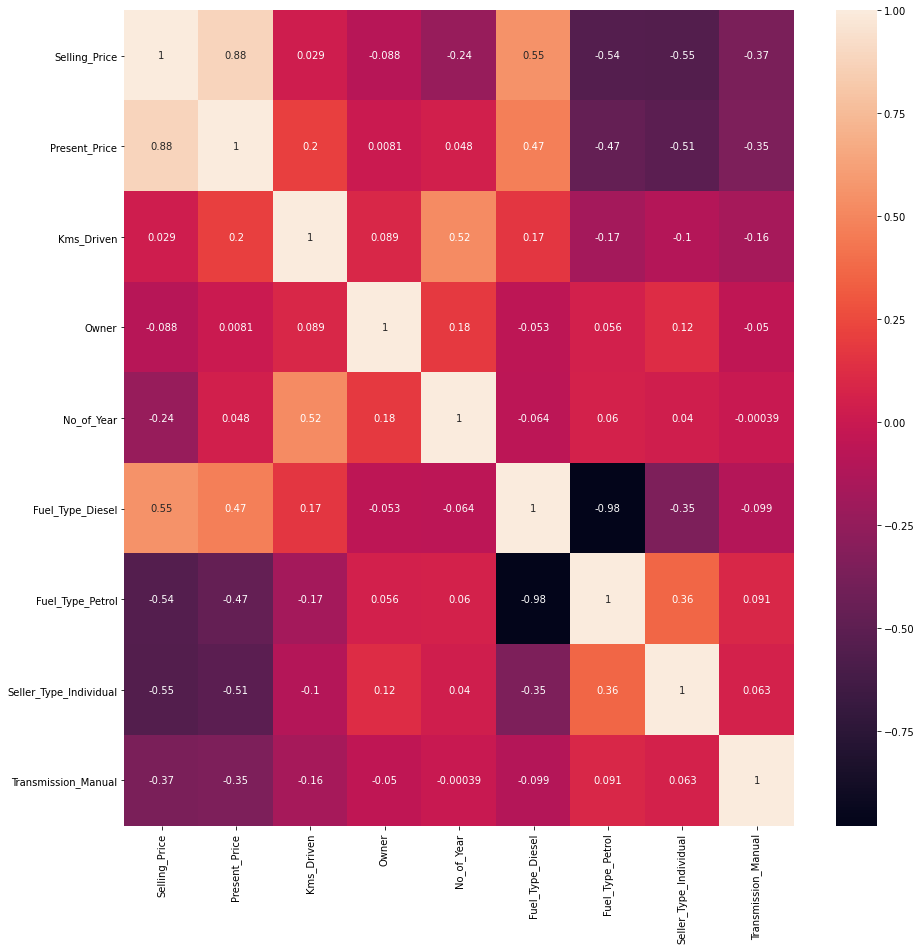

In [13]:
# Plot correlation

plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
# Independent and Dependent Feature
X = df_new1.iloc[:,1:]
y = df_new1.iloc[:,0]
X.head()

,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [15]:
## Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)



ExtraTreesRegressor()

In [16]:
print(model.feature_importances_)  ## Check which feature is important

[0.41205757 0.03963215 0.00049162 0.07610052 0.20991501 0.01829974
 0.11881518 0.1246882 ]


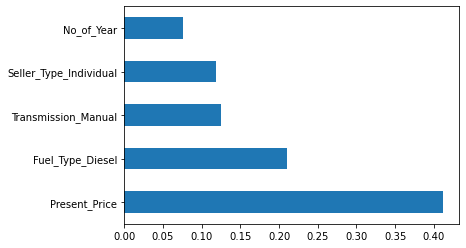

In [17]:
f_imp = pd.Series(model.feature_importances_,index=X.columns) # we can see easily which feature is most imporatnt
f_imp.nlargest(5).plot(kind='barh')
plt.show()

In [18]:
## split the data in tarin test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
y_test

296     9.50
149     0.51
288     8.40
5       9.25
208     7.90
       ...  
224     5.11
202     4.40
164     0.45
289    10.11
15      7.75
Name: Selling_Price, Length: 61, dtype: float64

In [20]:
# To select best parameters we use HYPERPARAMETER TUNING

#no of decision trees
n_estimators = [50,100,200,300,400]
# no of feature considered at every split
max_features = ['auto','sqrt']
# max no of levels in tree
max_depth = [int(x) for x in np.linspace(5,25,num=5)]
#min no of samples required to split each node
min_samples_split = [2,5,10,15,100]
#min no of samples required at each leaf node
min_samples_leaf = [1,2,5,10]



In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [22]:
## Randomized Search

from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
             'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

rs = RandomizedSearchCV(estimator = rf,param_distributions = param_grid,verbose=2,cv=5 )



In [23]:
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   19.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]},
                   verbose=2)

In [24]:
y_pred = rs.predict(X_test)

In [25]:
y_pred1 = pd.Series(y_pred)

In [57]:
result = pd.DataFrame(data={'Actual':y_test,'Prediction':y_pred})
result

,Actual,Prediction
296,9.50,8.339720
149,0.51,0.598369
288,8.40,9.501748
5,9.25,7.893654
208,7.90,6.622791
...,...,...
224,5.11,5.400477
202,4.40,5.042795
164,0.45,0.467205
289,10.11,10.517468


In [62]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9516541751501102

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

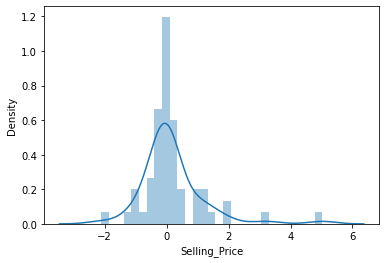

In [31]:
sns.distplot(y_test - y_pred)

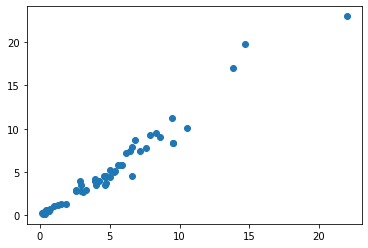

In [58]:
plt.scatter(y_pred,y_test)

In [59]:
## Save the model

import pickle
file = open('random_forest_car_prediction','wb')
pickle.dump(rf,file)